<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Credit_card_fraud_detection_Nishu_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'

### Batch: 18th July

### Project4: Credit Card Fraud Detection using Multiple Algorithm of Machine Learning like- SVM, KNN and ANN
### Dataset Link: https://www.dropbox.com/s/6qcgvoc6h8y8zb2/CreditCardDefault.csv?dl=1

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

### Loading the dataset

In [2]:
df=pd.read_csv('/content/sample_data/CreditCardDefault.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


### Data Processing & Understanding

In [3]:
df.shape

(2923, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2923 non-null   int64  
 1   V1      2923 non-null   float64
 2   V2      2923 non-null   float64
 3   V3      2923 non-null   float64
 4   V4      2923 non-null   float64
 5   V5      2923 non-null   float64
 6   V6      2923 non-null   float64
 7   V7      2923 non-null   float64
 8   V8      2923 non-null   float64
 9   V9      2923 non-null   float64
 10  V10     2923 non-null   float64
 11  V11     2923 non-null   float64
 12  V12     2923 non-null   float64
 13  V13     2923 non-null   float64
 14  V14     2923 non-null   float64
 15  V15     2923 non-null   float64
 16  V16     2923 non-null   float64
 17  V17     2923 non-null   float64
 18  V18     2923 non-null   float64
 19  V19     2923 non-null   float64
 20  V20     2923 non-null   float64
 21  V21     2923 non-null   float64
 22  

In [6]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,...,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2922.000000,2922.000000,2922.000000
mean,1157.248375,-0.334017,0.295477,0.845482,0.102388,-0.084588,0.041536,0.125553,-0.078615,0.039314,...,0.022294,-0.140314,-0.042219,0.013856,0.100449,0.031599,0.045141,0.001299,67.955986,0.000684
std,704.290301,1.393153,1.223387,0.986023,1.324235,1.237915,1.277126,1.121500,1.147635,0.912087,...,0.833485,0.618648,0.354303,0.595526,0.409030,0.478827,0.357938,0.265467,235.093423,0.026158
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-8.945496,-19.176657,-3.110515,...,-4.709977,-4.432106,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.909294,0.000000,0.000000
25%,550.000000,-1.088167,-0.180548,0.290367,-0.762449,-0.603171,-0.714916,-0.311558,-0.197142,-0.479566,...,-0.225683,-0.547154,-0.187037,-0.358373,-0.148071,-0.302827,-0.042663,-0.017615,3.817500,0.000000
50%,1135.000000,-0.458705,0.357519,0.868256,0.140817,-0.140202,-0.209263,0.122413,0.028133,0.010309,...,-0.080783,-0.143518,-0.058762,0.089264,0.118704,0.021763,0.029386,0.022927,13.990000,0.000000
75%,1712.000000,1.086080,0.950014,1.455047,1.002457,0.374203,0.421043,0.593711,0.287463,0.541219,...,0.089006,0.284397,0.070922,0.423843,0.370447,0.307106,0.184856,0.093151,56.965000,0.000000
max,2471.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,14.718212,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Visualization

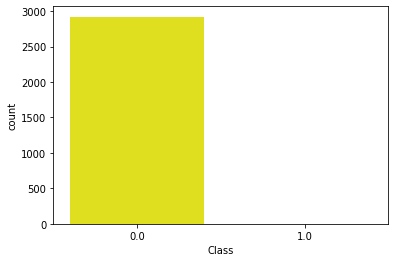

In [10]:
sns.countplot(x = df['Class'],color='yellow')

In [11]:
df['Class'].value_counts()

0.0    2920
1.0       2
Name: Class, dtype: int64

In [12]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [13]:
df.drop(['Time'], axis=1, inplace=True)

In [14]:
df.shape

(2922, 30)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(2882, 30)

### Train & Test Split

In [17]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [18]:
X.shape

(2882, 29)

In [19]:
y.shape

(2882,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345)

### Model Building

## 1. Support Vector Machine(SVM)

In [21]:
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [22]:
svm_yhat = svm.predict(X_test)
svm_yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Checking the accuracy of our svm model.

In [23]:
#Checking the accuracy of the model
score=accuracy_score(y_test,svm_yhat)
print("Accuracy:",score)

Accuracy: 1.0


In [24]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

### Checking the accuracy of our svm model and plotting confusion matrix.

Support Vector Machine(SVM)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       865

    accuracy                           1.00       865
   macro avg       1.00      1.00      1.00       865
weighted avg       1.00      1.00      1.00       865

Accuracy using Support Vector Machine(SVM): 100.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


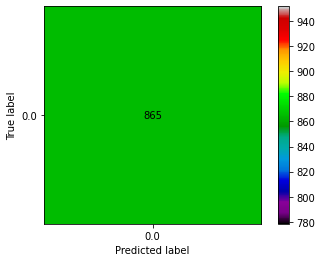

In [25]:
print('Support Vector Machine(SVM)')
report(svm)
print(f'Accuracy using Support Vector Machine(SVM): {round(score*100,2)}%')

## 2. k-nearest neighbors or knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
knn_yhat = KNN.predict(X_test)
knn_yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Checking the accuracy of our knn model.

In [28]:
#Checking the accuracy of the model
score2=accuracy_score(y_test,knn_yhat)
print("Accuracy:",score2)

Accuracy: 1.0


### Checking the accuracy of our knn model and plotting confusion matrix.

K-Nearest Neighbors(KNN)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       865

    accuracy                           1.00       865
   macro avg       1.00      1.00      1.00       865
weighted avg       1.00      1.00      1.00       865



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy using K-Nearest Neighbors(KNN): 100.0%


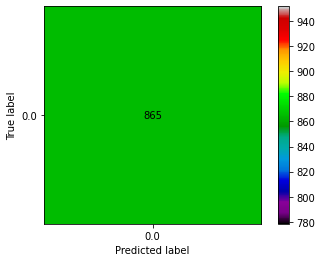

In [29]:
print('K-Nearest Neighbors(KNN)')
report(KNN)
print(f'Accuracy using K-Nearest Neighbors(KNN): {round(score2*100,2)}%')

## 3. Artificial Neural Network or ANN

In [32]:
df = df.drop(['Amount'],axis=1)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.0


In [33]:
x = df.iloc[:, df.columns != 'Class']
Y = df.iloc[:, df.columns == 'Class']

In [34]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  1.0
Percentage of fraud transactions:  0.0
Total number of transactions in resampled data:  4


In [35]:
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  1.0
Percentage of fraud transactions:  0.0
Total number of transactions in resampled data:  4


In [36]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size = 0.3, random_state = 18976)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 18976)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  2017
Number transactions test dataset:  865
Total number of transactions:  2882

Number transactions train dataset:  2
Number transactions test dataset:  2
Total number of transactions:  4


In [37]:
scaled_X_train = sc.fit_transform(X_train_undersample)
scaled_X_test = sc.fit_transform(X_test_undersample)

In [38]:
X_train_undersample.shape

(2, 28)

### Checking the accuracy of our ann model and printing the report.

In [39]:
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow import keras
def ANN(scaled_X_train, y_train, scaled_X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(28, input_dim=28, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(scaled_X_train, y_train, epochs=100)

    print(model.evaluate(scaled_X_test, y_test))

    y_preds = model.predict(scaled_X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [40]:
y_preds = ANN(scaled_X_train, y_train_undersample, scaled_X_test, y_test_undersample, 'binary_crossentropy')

Epoch 1/100
1/1 [==============================] - 1s 975ms/step - loss: 0.4052 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3791 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3535 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3284 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3040 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2809 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2586 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2369 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2161 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1961 - accuracy: 1.0000
Epoch 11/100
1/1 [=

In [41]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_preds[:5]

array([[0.],
       [0.]], dtype=float32)

In [43]:
y_pred[:5]

[0, 0]

Text(69.0, 0.5, 'Truth')

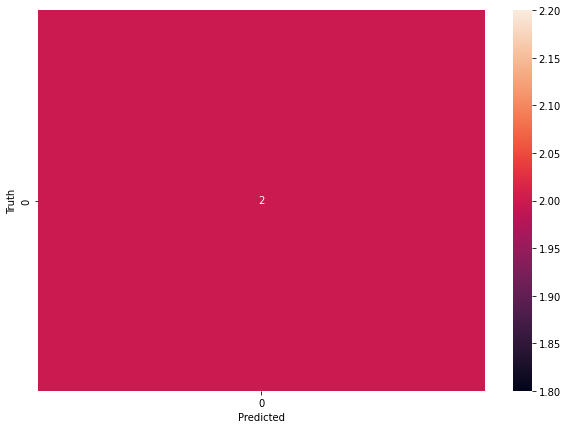

In [44]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test_undersample,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
model = keras.Sequential([
        keras.layers.Dense(28, input_dim=28, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_undersample,y_train_undersample, epochs=100)

print(model.evaluate(X_test_undersample, y_test_undersample))

y_preds = model.predict(X_test.values)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/100
1/1 [==============================] - 1s 633ms/step - loss: 0.5615 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5325 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5041 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4779 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4531 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4290 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4043 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3812 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3593 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3402 - accuracy: 1.0000
Epoch 11/100
1/1 [=======

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Well, congratulation!! We just received 99.95% approx accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

# **THANK YOU........))**